# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('C:/Users/Ironhack/Documents/Ironhack/Week1/data-labs/module-2/lab-correlation-tests-with-scipy/your-code/fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
import re
fifa['ValueNumeric'] = fifa['Value'].str.extract('(\d+)', expand = False).astype(int)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [43]:
# fifa.loc[fifa['Preferred Foot'] == 'Right'] = 1

# fifa.loc[fifa['Preferred Foot'] == 'Left'] = 0

# fifa['Preferred Foot'] = fifa['Preferred Foot'].astype(int)

In [30]:
# Your code here:

# fifa.loc[fifa['Preferred Foot'] == 'Right'] = 1

# fifa.loc[fifa['Preferred Foot'] == 'Left'] = 0

from scipy.stats import f_oneway

p_val = f_oneway(
    fifa['Preferred Foot'],
    fifa['ValueNumeric']
)[1]

p_val

nan

What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
# Your code here:



What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [5]:
# Your code here:
#fifa.isnull().sum()
fifa = fifa.dropna()


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [10]:
# Your code here:
fifa.columns = fifa.columns.str.replace(' ','_')

from scipy.stats import linregress
import statsmodels.api as sm

slope, intercept, r_value, p_value, std_err = linregress(fifa.Stamina, fifa.SprintSpeed)

x = sm.add_constant(fifa.Stamina)
y = fifa.SprintSpeed

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print(model.summary())


OLS Regression Results                            
Dep. Variable:            SprintSpeed   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:44:51   Log-Likelihood:                -69207.
No. Observations:               17918   AIC:                         1.384e+05
Df Residuals:                   17916   BIC:                         1.384e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5917      0.353     81.054      0.000      27.900      29.283
S

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [11]:
slope, intercept, r_value, p_value, std_err = linregress(fifa.ValueNumeric, fifa.Potential)
slope, intercept, r_value, p_value, std_err
X = sm.add_constant(fifa.ValueNumeric) # We must add the intercept using the add_constant function

Y = fifa.Potential

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


OLS Regression Results                            
Dep. Variable:              Potential   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1056.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.17e-225
Time:                        20:56:27   Log-Likelihood:                -57441.
No. Observations:               17918   AIC:                         1.149e+05
Df Residuals:                   17916   BIC:                         1.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.6691      0.061   1196.506      0.000      72.550      72

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

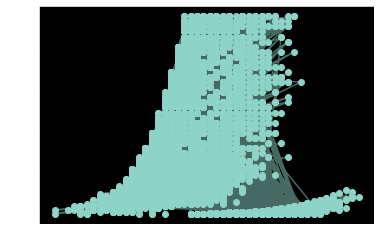

In [12]:
# Your code here:
# Your code here:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(fifa['Potential'], fifa['ValueNumeric'])
plt.plot(
    fifa['Potential'],
    fifa['ValueNumeric'], # y = mx + b
    alpha = .5,
)
